This jupyter notebook provides the code stumps for the exam questions.

## Question 1: Profit Optimization for Hotel Room Sales

In [2]:
import math

In [3]:
# I use math to round down as I know this one and don't know how to make the symbols in the exam
def demand(p):
    D = math.floor(1000-2.2*p)
    return D
    

In [7]:
def revenue(p):
    R = math.floor(1000-2.2*p)*p
    return R

In [9]:
def total_cost(p):
    if math.floor(1000-2.2*p)<=60:
        cost = math.floor(1000-2.2*p)*50
    elif math.floor(1000-2.2*p)<=150:
         cost = math.floor(1000-2.2*p)*40
    elif math.floor(1000-2.2*p)>200:
        cost = 200*30
    else:
        cost = math.floor(1000-2.2*p)*30
    if math.floor(1000-2.2*p)>100:
        cost += 20000
    return cost



In [10]:
def profit(p):
    prof = revenue(p) - total_cost(p)
    return prof

In [13]:
profit(200)

86000

## Question 2: Hotel Reservation Management

In [17]:
def process_reservation(hotel, reservation):
    rooms_available = hotel["rooms_available"]
    adr_threshold = hotel["adr_threshold"]
    rooms = reservation["rooms"]
    adr = reservation["adr"]
    id = reservation["id"]
    if adr>=adr_threshold & rooms_available>=rooms:
        bookings = {"id": "Booking "+str(id)+" is accepted. "+ str(rooms)+" rooms have been booked."}
        rooms_available -= rooms
    hotel = {"rooms_available":rooms_available, "adr_threshold": adr_threshold, "bookings": bookings}
    return hotel

In [18]:
def process_reservations(hotel, reservations):
    for i in reservations:
        hotel = process_reservation(hotel, i)

## Question 3

The dataset is provided in the `data.csv` file.

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(pd.read_csv("data.csv"))

In [27]:
df[["adr", "num_rooms"]].describe()

,adr,num_rooms
count,7300.000000,7300.000000
mean,240.867945,2.996575
std,119.865884,1.415613
min,44.000000,1.000000
25%,148.000000,2.000000
50%,222.000000,3.000000
75%,310.000000,4.000000
max,716.000000,5.000000


In [4]:
import seaborn as sns

<Axes: xlabel='room_type', ylabel='count'>

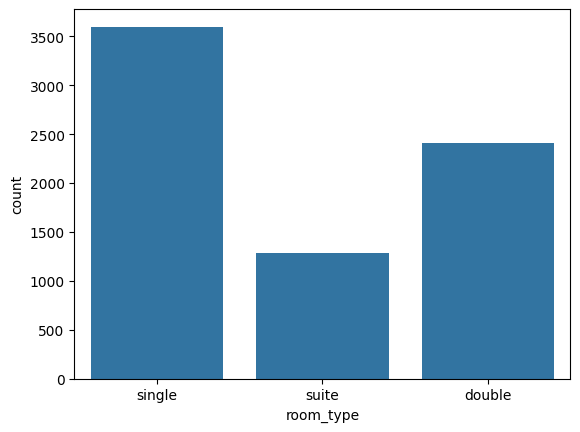

In [33]:
sns.countplot(x="room_type", data=df)

<Axes: xlabel='location', ylabel='count'>

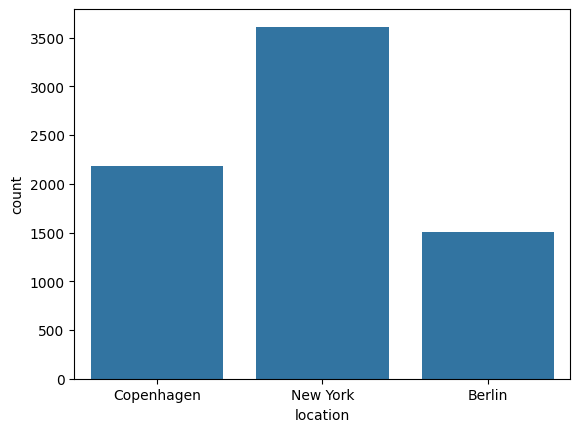

In [34]:
sns.countplot(x="location", data=df)

In [5]:
df["date"] = pd.to_datetime(df["date"])

<Axes: xlabel='date', ylabel='adr'>

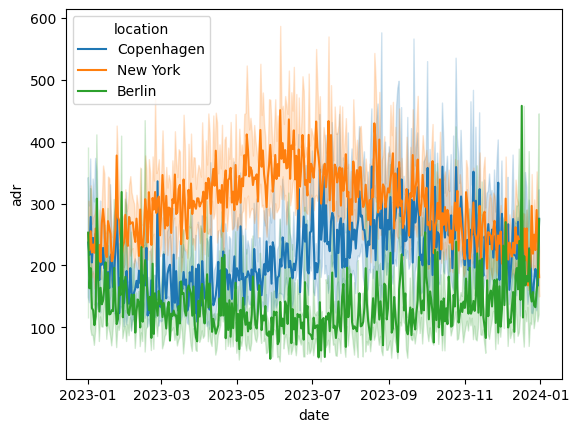

In [38]:
sns.lineplot(x="date", y="adr", data=df, hue="location")

In [46]:
df.groupby(["room_type", "location"])["num_rooms"].describe()

count      mean       std  min  25%  50%  75%  max
room_type location                                                       
double    Berlin       276.0  2.876812  1.382766  1.0  2.0  3.0  4.0  5.0
          Copenhagen   693.0  3.033189  1.442660  1.0  2.0  3.0  4.0  5.0
          New York    1445.0  3.004844  1.400674  1.0  2.0  3.0  4.0  5.0
single    Berlin      1075.0  3.049302  1.421564  1.0  2.0  3.0  4.0  5.0
          Copenhagen  1066.0  3.000000  1.396844  1.0  2.0  3.0  4.0  5.0
          New York    1458.0  2.972565  1.437058  1.0  2.0  3.0  4.0  5.0
suite     Berlin       152.0  3.085526  1.346785  1.0  2.0  3.0  4.0  5.0
          Copenhagen   426.0  2.960094  1.406139  1.0  2.0  3.0  4.0  5.0
          New York     709.0  2.957687  1.428489  1.0  2.0  3.0  4.0  5.0

In [47]:
df.groupby(["room_type", "location"])["adr"].describe()

count        mean         std    min     25%    50%  \
room_type location                                                           
double    Berlin       276.0  169.601449   46.712123   87.0  131.75  168.0   
          Copenhagen   693.0  222.253968   59.369755  115.0  179.00  215.0   
          New York    1445.0  303.606228   73.086651  161.0  248.00  296.0   
single    Berlin      1075.0  100.313488   31.612460   44.0   74.00  100.0   
          Copenhagen  1066.0  152.466229   39.593584   76.0  123.25  146.0   
          New York    1458.0  225.054870   54.368160  122.0  183.00  222.0   
suite     Berlin       152.0  305.447368   70.589832  173.0  253.50  299.0   
          Copenhagen   426.0  376.708920   96.617985  202.0  302.50  371.5   
          New York     709.0  442.018336  105.664876  244.0  364.00  428.0   

                         75%    max  
room_type location                   
double    Berlin      206.00  282.0  
          Copenhagen  259.00  374.0  
          New York    353.00  479.0  
single    Berlin      123.00  172.0  
          Copenhagen  181.00  246.0  
          New York    264.00  356.0  
suite     Berlin      361.25  458.0  
          Copenhagen  443.00  619.0  
          New York    515.00  716.0

In [6]:
def demand(df,location, adr, room_type):
    df = df[(df["location"]==location) & (df["adr"]>=adr) & (df["room_type"]==room_type)]
    dOut = df["num_rooms"].sum()
    return dOut

In [34]:
for location in df["location"].unique():
    for room_type in df["room_type"].unique():
        for adr in range(50,601,50):
            demands.append(demand(df, location, adr, room_type))


In [ ]:
# For my output I do not have a way to distinguise which demand belongs to which room_type or which location. I cannot get it to add
# in the way I thought it would. But I would add it to the dataframe "demands" such that it specifies which it belongs to in a column for itself
# I would also add the same for adr, then using that I would write the following code for the plot
g = sns.FacetGrid(demands, col="location")
g.map_dataframe(sns.lineplot, x = "adr", y="demand", hue="room_type");

#### Refelction:
First and foremost demand functions are always hard to come by. We can't really know peoples willingness to pay, the only way to do so is to experiment with the price in a controlled setting, where we are able to change 1 variable ceteris paribus. However in the real world many things that we cannot control will change, making it hard to distinguise if the change in demand is due to a change in price, season, political or social events nearby, tax changes or something else entirely. 

## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

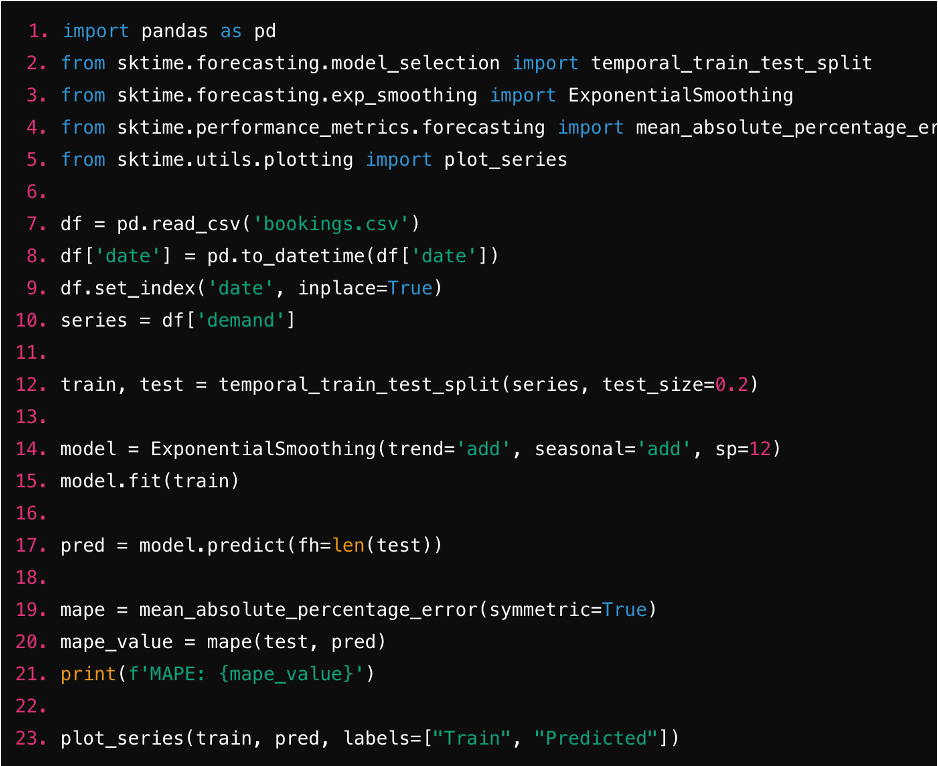

#### a)
* 9:
Normally our index in a data frame is just 1,2,3... and so on for us to distinguise between simillar data inputs or for when we clean data to know where it came from in the original data frame. Here we instead make our index date instead.

* 12:
Here we split our data up into a training set and a testing set, where we randomly select 20% or the data df["demand"] to be in our test set and the rest is in our training set. This is a very common practice in machine learning to train and evaluate a prediciton model.

* 14:


* 15:

* 17:

* 19,20:

* 23:


## Question 5

In [12]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1